In [1]:
import pandas as pd

In [2]:
Data = pd.read_csv('./tripadvisor_hotel_reviews.csv')
Data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [3]:
Data = Data.sample(100)
Data

,Review,Rating
11666,not bad pay booked connecting rooms 4 people a...,4
713,"great hotel, told desk staff write version sta...",5
10178,"great place stay wonderful stay hotel, beautif...",5
8579,"bit let, stayed hotel final 3 days honeymoon, ...",2
20121,"awesome little downfalls, review long tells, r...",4
...,...,...
733,"fabulous, stay dauphine orleans, better pictur...",5
18388,great hotel boyfriend stayed suites 1 king wes...,5
9154,gem hotel lovely small hotel situated minutes ...,4
19523,great hotel stayed hotel mela weekend 12/12-12...,5


In [4]:
print(Data.shape)

(100, 2)


In [5]:
Data['Rating'].value_counts()

5    40
4    36
1    10
2     8
3     6
Name: Rating, dtype: int64

In [6]:
Data["text"] = Data["Review"].astype(str)

In [7]:
Data['text'].head()

11666    not bad pay booked connecting rooms 4 people a...
713      great hotel, told desk staff write version sta...
10178    great place stay wonderful stay hotel, beautif...
8579     bit let, stayed hotel final 3 days honeymoon, ...
20121    awesome little downfalls, review long tells, r...
Name: text, dtype: object

In [8]:
def classes_def(x):
    if x == 1 or x==2:
        return "Low"
    elif x == 3:
        return "Med"
    elif x == 4 or x == 5:
        return "High"
Data['rate']=Data['Rating'].apply(lambda x:classes_def(x))
target=Data['rate']
Data['rate'].value_counts()

High    76
Low     18
Med      6
Name: rate, dtype: int64

In [9]:
import re

In [10]:
#Removes the urls on the column 'text'
Data['text'] = Data['text'].apply(lambda x:re.sub(r'\s*https?://t\.co/[a-zA-Z0-9]+\s*', ' ', x))
print(Data['text'])

11666    not bad pay booked connecting rooms 4 people a...
713      great hotel, told desk staff write version sta...
10178    great place stay wonderful stay hotel, beautif...
8579     bit let, stayed hotel final 3 days honeymoon, ...
20121    awesome little downfalls, review long tells, r...
                               ...                        
733      fabulous, stay dauphine orleans, better pictur...
18388    great hotel boyfriend stayed suites 1 king wes...
9154     gem hotel lovely small hotel situated minutes ...
19523    great hotel stayed hotel mela weekend 12/12-12...
12765    hilton lower manhattan wife stayed hotel twice...
Name: text, Length: 100, dtype: object


In [11]:
# We can also remove any numbers, as they may not be useful to the analysis, using a similar approach.
Data['text'] = Data['text'].apply(lambda x:re.sub(r'[0-9]+', '', x))
print(Data['text'])

11666    not bad pay booked connecting rooms  people am...
713      great hotel, told desk staff write version sta...
10178    great place stay wonderful stay hotel, beautif...
8579     bit let, stayed hotel final  days honeymoon, a...
20121    awesome little downfalls, review long tells, r...
                               ...                        
733      fabulous, stay dauphine orleans, better pictur...
18388    great hotel boyfriend stayed suites  king west...
9154     gem hotel lovely small hotel situated minutes ...
19523    great hotel stayed hotel mela weekend /-/ mom,...
12765    hilton lower manhattan wife stayed hotel twice...
Name: text, Length: 100, dtype: object


In [12]:
# Importing necessary library
import nltk.corpus #natural language toolkit
# import nltk.corpus
nltk.download('stopwords')
nltk.download('punkt')
import os
from nltk.tokenize import word_tokenize
# Passing the string text into word tokenize for breaking the sentences
Token_list=[]
for tweet in Data['text']:
    Token_list.append(word_tokenize(tweet))
#Let us look at the content of the first review as a set of tokens, and the rating.
print(Token_list[0])
print(Data.iloc[0:1])

['not', 'bad', 'pay', 'booked', 'connecting', 'rooms', 'people', 'amerisuites', 'miami', 'blue', 'lagoon', 'post', 'cruise', 'weekend', 'stay', 'january', 'based', 'entirely', 'information', 'read', 'web', 'site', ',', 'got', 'cruise', 'ship', 'early', 'able', 'rooms', 'saturday', 'morning', 'definetly', 'appreciated', 'let', 'unpack', 'rest', 'cleanup', 'earlier', 'start', 'day', ',', 'rooms', 'large', 'modern', 'clean', 'worked', ',', 'paid', '/night', 'pus', 'tax', 'room', ',', 'desk', 'friendly', 'helpful', ',', 'said', 'outside', 'small', 'pool', 'open', 'hours', ',', 'security', 'guard', 'parking', 'lot', 'hotel', 'hrs', 'day', 'hotel', 'located', 'quiet', 'nice', 'area', 'condos', 'airport', ',', 'saw', 'people', 'jogging', 'sidewalk', 'road', 'hotel', 'morning', 'road', "n't", 'busy', 'properties', 'passes', 'nicely', 'landscapped', 'runner', 'nice', ',', 'fitness', 'room', 'standard', 'small', 'room', 'treadmill', 'exercise', 'bike', 'peice', 'equipment', 'plus', 'tv', ',', 'm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghanshyam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ghanshyam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [13]:
#Remove the puntuation and other non alphanumeric tokens
for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word.isalnum() ]

#Again we look at first review to see the effect.
print(Token_list[0])

['not', 'bad', 'pay', 'booked', 'connecting', 'rooms', 'people', 'amerisuites', 'miami', 'blue', 'lagoon', 'post', 'cruise', 'weekend', 'stay', 'january', 'based', 'entirely', 'information', 'read', 'web', 'site', 'got', 'cruise', 'ship', 'early', 'able', 'rooms', 'saturday', 'morning', 'definetly', 'appreciated', 'let', 'unpack', 'rest', 'cleanup', 'earlier', 'start', 'day', 'rooms', 'large', 'modern', 'clean', 'worked', 'paid', 'pus', 'tax', 'room', 'desk', 'friendly', 'helpful', 'said', 'outside', 'small', 'pool', 'open', 'hours', 'security', 'guard', 'parking', 'lot', 'hotel', 'hrs', 'day', 'hotel', 'located', 'quiet', 'nice', 'area', 'condos', 'airport', 'saw', 'people', 'jogging', 'sidewalk', 'road', 'hotel', 'morning', 'road', 'busy', 'properties', 'passes', 'nicely', 'landscapped', 'runner', 'nice', 'fitness', 'room', 'standard', 'small', 'room', 'treadmill', 'exercise', 'bike', 'peice', 'equipment', 'plus', 'tv', 'morning', 'continental', 'breakfast', 'chioces', 'substantial',

In [14]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)# pronouns and prepositions mainly
# importing stopwors from nltk library
from nltk import word_tokenize
from nltk.corpus import stopwords
a = set(stopwords.words('english'))
for i in range (0,len(Token_list)):
    Token_list[i] =[word for word in Token_list[i] if word not in a ]
print(Token_list[0])
#print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
from nltk.util import ngrams
def words_to_ngrams(words, n, sep=" "):
    return [sep.join(words[i:i+n]) for i in range(len(words)-n+1)]
print("Bigrams: ", words_to_ngrams(Token_list[0],2))
print("\nTrigrams: ",words_to_ngrams(Token_list[0],3))

Bigrams:  ['bad pay', 'pay booked', 'booked connecting', 'connecting rooms', 'rooms people', 'people amerisuites', 'amerisuites miami', 'miami blue', 'blue lagoon', 'lagoon post', 'post cruise', 'cruise weekend', 'weekend stay', 'stay january', 'january based', 'based entirely', 'entirely information', 'information read', 'read web', 'web site', 'site got', 'got cruise', 'cruise ship', 'ship early', 'early able', 'able rooms', 'rooms saturday', 'saturday morning', 'morning definetly', 'definetly appreciated', 'appreciated let', 'let unpack', 'unpack rest', 'rest cleanup', 'cleanup earlier', 'earlier start', 'start day', 'day rooms', 'rooms large', 'large modern', 'modern clean', 'clean worked', 'worked paid', 'paid pus', 'pus tax', 'tax room', 'room desk', 'desk friendly', 'friendly helpful', 'helpful said', 'said outside', 'outside small', 'small pool', 'pool open', 'open hours', 'hours security', 'security guard', 'guard parking', 'parking lot', 'lot hotel', 'hotel hrs', 'hrs day', '

In [16]:
# finding the frequency distinct in the tokens
# Importing FreqDist library from nltk and passing token into FreqDist
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range (0,len(Token_list)):
    for word in Token_list[i]:
        fdist[word.lower()]+=1
fdist

FreqDist({'hotel': 271, 'room': 160, 'great': 109, 'good': 81, 'staff': 77, 'location': 73, 'stay': 63, 'breakfast': 56, 'rooms': 55, 'service': 54, ...})

In [17]:
#Concatenate the words together for each document or review
word_concat=[' '.join(word) for word in Token_list]

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(word_concat)
print (text_tf.todense())

[[0.05213716 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [19]:
X = text_tf

In [20]:
y=Data['rate']
from sklearn.preprocessing import LabelEncoder
#encode the labels from strings to values.
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)
y

['High' 'Low' 'Med']


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='entropy',max_depth= 2,class_weight='balanced')
clf.fit(X_train,y_train);
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Results on the test set:
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        30
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.77        30
   macro avg       0.33      0.26      0.29        30
weighted avg       1.00      0.77      0.87        30



/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ghanshyam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


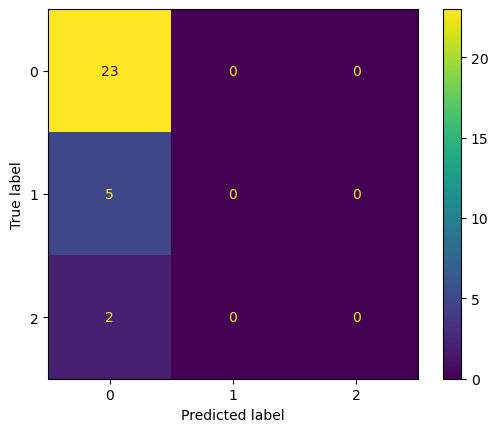

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#we can get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
#we can plot it
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
print('Results on the test set:')
print(classification_report(y_pred, y_test))

In [24]:
words = ''
# iterate through the text attribute in the dataframe splitting the text into the component tokens
for val in Data['text'] :
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    words += " ".join(tokens)+" "

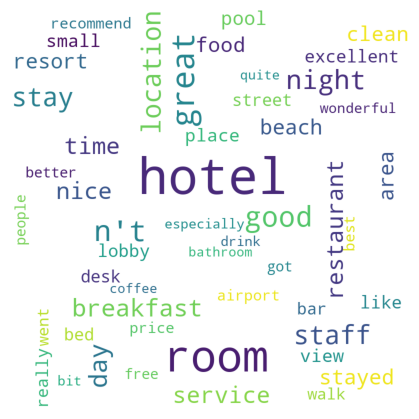

In [27]:
# importing all necessery modules
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = a,#We don't want to see stopwords in the word clous
                      min_font_size = 10,
                      max_font_size=100,
                      max_words=50).generate(words)


# plot the WordCloud image
plt.figure(figsize = (4, 4), alpha=0.5)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()